# Using autoencoders


In this notebook, I am going to use some autoencoders and see how their representations look

In [2]:
import numpy as np
import utils
import clusterUtils
import tagStruct
import importlib
import matplotlib.pyplot as plt



Here, we are going to create the tag data sets as normal

In [3]:
tags = utils.loadDatasets(threshold = 30 , truncationLength = 200)

pureCounts10PCS = []
for i in range(0, len(tags)):
    pureCounts10PCS.append(utils.createRepresentation(tags[i], numComponents = 10, probability = False))
    

data/5111027PAM110P0574TS.csv
['time', 'depth', 'temperature', 'light level']
found:  time
data/5111033PAM110P0587-Archive.csv
['time', 'depth', 'temperature', 'light level']
found:  time
data/5111034PAM110P0588-Archive.csv
['time', 'depth', 'temperature', 'light level']
found:  time
data/5111045PAM110P0590-Archive.csv
['time', 'depth', 'temperature', 'light level']
found:  time
data/5112030PAM110P0416-Archive.csv
['time', 'depth', 'temperature', 'light level']
found:  time
data/5112039PAM111P0762-Archive.csv
['time', 'depth', 'temperature', 'light level']
found:  time
data/5112041PAM111P0763-Archive.csv
['time', 'depth', 'temperature', 'light level']
found:  time


KeyboardInterrupt: 

In [ ]:
x_train = tags[0].__raw__.iloc[:, tags[0].findIndex("depth")]
print(len(x_train))




asList = np.split(x_train[:1489839-39], 7449)
print(len(asList))


trainData = np.stack(asList, axis=0)

Next, we are going to be utilizing a 1-dimensional convolutional autoencoder

In [6]:
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D
from keras.models import Model
from keras import backend as K



x_train = asTestData[:6000, :]
x_test = asTestData[6000:, :]
print(x_test.shape)

x_train = np.reshape(x_train, (6000, 200, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (1449, 200, 1))  # adapt this if using `channels_first` image data format

input_img = Input(shape=(200, 1))  # adapt this if using `channels_first` image data format

print(input_img.shape)
x = Conv1D(20, (3), activation='relu', padding='same')(input_img)
print(x.shape)
x = MaxPooling1D((2), padding='same')(x)
print(x.shape)
x = Conv1D(20, (3), activation='relu', padding='same')(x)
print(x.shape)
x = MaxPooling1D((2), padding='same')(x)
print("fdsd", x.shape)
x = Conv1D(20, (3), activation='relu', padding='same')(x)
print(x.shape)
encoded = MaxPooling1D((2), padding='same')(x)
print(x.shape)
print("------------")# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x = UpSampling1D((2))(x)
print(x.shape)
x = Conv1D(10, (5), activation='relu', padding='same')(x)
print(x.shape)
x = UpSampling1D((2))(x)
print("where are we", x.shape)
decoded = Conv1D(10, (3), activation='relu')(x)
print(decoded.shape)
#x = MaxPooling1D((2), padding='same')(x)
#print("halved", x.shape)
decoded = Conv1D(1, (1), activation='sigmoid', padding='same')(x)
print("decoded", decoded.shape)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


ModuleNotFoundError: No module named 'keras'

In [157]:
from keras.callbacks import TensorBoard

x_train = np.nan_to_num(x_train, 0)
x_test = np.nan_to_num(x_test, 0)

v

Train on 6000 samples, validate on 1449 samples
Epoch 1/500
6000/6000 [==============================] - 2s 412us/step - loss: -1274.6296 - val_loss: -1150.9684
Epoch 2/500
6000/6000 [==============================] - 2s 403us/step - loss: -1530.2867 - val_loss: -1151.5837
Epoch 3/500
6000/6000 [==============================] - 2s 394us/step - loss: -1530.9503 - val_loss: -1152.2391
Epoch 4/500
6000/6000 [==============================] - 2s 411us/step - loss: -1531.1937 - val_loss: -1152.4057
Epoch 5/500
6000/6000 [==============================] - 3s 438us/step - loss: -1531.2688 - val_loss: -1152.4667
Epoch 6/500
6000/6000 [==============================] - 2s 362us/step - loss: -1531.2959 - val_loss: -1152.4905
Epoch 7/500
6000/6000 [==============================] - 2s 402us/step - loss: -1531.3163 - val_loss: -1152.5045
Epoch 8/500
6000/6000 [==============================] - 2s 319us/step - loss: -1531.3379 - val_loss: -1152.5295
Epoch 9/500
6000/6000 [=========================

6000/6000 [==============================] - 2s 311us/step - loss: -1531.6157 - val_loss: -1153.2847
Epoch 144/500
6000/6000 [==============================] - 2s 348us/step - loss: -1531.6154 - val_loss: -1153.2835
Epoch 145/500
6000/6000 [==============================] - 2s 300us/step - loss: -1531.6157 - val_loss: -1153.2843
Epoch 146/500
6000/6000 [==============================] - 2s 292us/step - loss: -1531.6158 - val_loss: -1153.2801
Epoch 147/500
6000/6000 [==============================] - 2s 280us/step - loss: -1531.6157 - val_loss: -1153.2800
Epoch 148/500
6000/6000 [==============================] - 2s 280us/step - loss: -1531.6152 - val_loss: -1153.2835
Epoch 149/500
6000/6000 [==============================] - 2s 281us/step - loss: -1531.6163 - val_loss: -1153.2846
Epoch 150/500
6000/6000 [==============================] - 2s 292us/step - loss: -1531.6160 - val_loss: -1153.2842
Epoch 151/500
6000/6000 [==============================] - 2s 255us/step - loss: -1531.6160 - 

6000/6000 [==============================] - 2s 302us/step - loss: -1531.6179 - val_loss: -1153.2882
Epoch 215/500
6000/6000 [==============================] - 2s 309us/step - loss: -1531.6176 - val_loss: -1153.2759
Epoch 216/500
6000/6000 [==============================] - 2s 280us/step - loss: -1531.6178 - val_loss: -1153.2873
Epoch 217/500
6000/6000 [==============================] - 2s 303us/step - loss: -1531.6178 - val_loss: -1153.2810
Epoch 218/500
6000/6000 [==============================] - 2s 279us/step - loss: -1531.6176 - val_loss: -1153.2872
Epoch 219/500
6000/6000 [==============================] - 2s 292us/step - loss: -1531.6181 - val_loss: -1153.2864
Epoch 220/500
6000/6000 [==============================] - 2s 317us/step - loss: -1531.6180 - val_loss: -1153.2882
Epoch 221/500
6000/6000 [==============================] - 2s 361us/step - loss: -1531.6179 - val_loss: -1153.2884
Epoch 222/500
6000/6000 [==============================] - 2s 361us/step - loss: -1531.6177 - 

KeyboardInterrupt: 

In [153]:
decoded_imgs = autoencoder.predict(x_test)
decoded_imgs.shape

(1449, 200, 1)

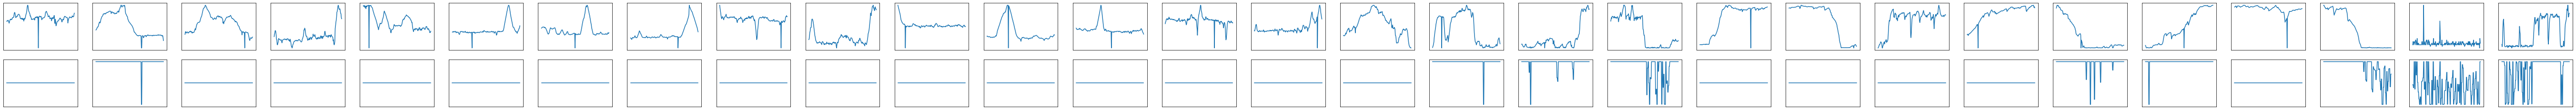

In [158]:
decoded_imgs = autoencoder.predict(x_test)

n = 30
plt.figure(figsize=(100, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.plot(x_test[i].reshape(200, 1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.plot(decoded_imgs[i].reshape(200, 1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model

inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

In [ ]:
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model

ts = tags[0].__raw__.iloc[:, tags[0].findIndex("depth")]

latent_dim = 15
inputs = Input(shape=(ts.shape[0], 1))
encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(ts.shape[0])(encoded)
decoded = LSTM(ts.shape[0], return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)


Using TensorFlow backend.


In [ ]:
sequence_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

sequence_autoencoder.fit(x_train, x_train,
                epochs=500,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Alright, let's next look at using a variational autoencoder. We do this by taking each dive and using its matrix representation as the object for the VAE to encode. 

In [ ]:
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)


def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., std=epsilon_std)
    return z_mean + K.exp(z_log_sigma) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_sigma])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])



decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)


# end-to-end autoencoder
vae = Model(x, x_decoded_mean)

# encoder, from inputs to latent space
encoder = Model(x, z_mean)

# generator, from latent space to reconstructed inputs
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)



def vae_loss(x, x_decoded_mean):
    xent_loss = objectives.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

vae.compile(optimizer='rmsprop', loss=vae_loss)


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))